# قسمت اول پروژه اول
## طبقه بندی چند کلاسه

### کتابخانه های مورد نیاز

In [43]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations


import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action="ignore", category=ConvergenceWarning)

## قسمت اول

In [44]:
data = np.load('mnist.npz')
indices = np.random.choice(len(X), size=10000, replace=False)
X = X[indices]
y = y[indices]
y = y.reshape(-1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## قسمت دوم

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## قسمت سوم

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

k = 10
scores = cross_val_score(knn, X_train_scaled, y_train, cv=k)
average_accuracy = scores.mean()

print("Average accuracy:", average_accuracy)

Average accuracy: 0.907


In [49]:
k_values = range(1,21, 2)

train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_train_pred = knn.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    y_test_pred = knn.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

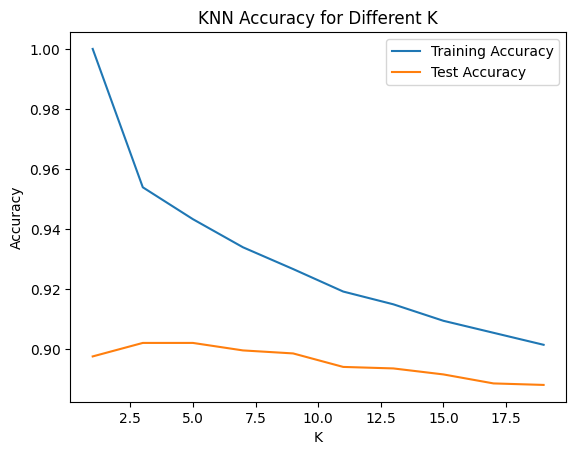

In [50]:
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, np.array(test_accuracies), label='Test Accuracy')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.title('KNN Accuracy for Different K')
plt.show()

## قسمت چهارم

In [51]:


class1 = 0  
class2 = 1  


X_selected = X[(y == class1) | (y == class2)]
y_selected = y[(y == class1) | (y == class2)]


X_train, X_val, y_train, y_val = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

accuracy = clf.score(X_val, y_val)
print("Accuracy:", accuracy)


Accuracy: 0.9976580796252927


## قسمت پنجم

In [52]:
y_flat = list(y.ravel())
y_flat = [int(value) for value in y_flat]

class_pairs = list(combinations(set(y_flat), 2))
print(class_pairs)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [53]:
svm_models = []
accs = []
for class_pair in class_pairs:
    
    cl1, cl2 = class_pair
    print(f"Building SVM model for classes {cl1} and {cl2}")
    
    X_pair = X[(y == cl1) | (y == cl2)]
    y_pair = y[(y == cl1) | (y == cl2)]
    
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y_pair, test_size=0.2, random_state=0)
    
    clf = svm.SVC(kernel='linear', decision_function_shape='ovo' , max_iter=1000)
    clf.fit(X_train, y_train)
    
    svm_models.append(clf)
    
    y_pred = clf.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    accs.append(accuracy)
    print(f"Accuracy for classes {cl1} and {cl2}: {accuracy}")

min_model  = np.argmin(accs)
print(f"Accuracy in model {class_pairs[min_model]} is the lowest: {min(accs)}")
print(len(svm_models))


Building SVM model for classes 0 and 1
Accuracy for classes 0 and 1: 1.0
Building SVM model for classes 0 and 2
Accuracy for classes 0 and 2: 0.9774436090225563
Building SVM model for classes 0 and 3
Accuracy for classes 0 and 3: 0.9848101265822785
Building SVM model for classes 0 and 4
Accuracy for classes 0 and 4: 1.0
Building SVM model for classes 0 and 5
Accuracy for classes 0 and 5: 0.9841269841269841
Building SVM model for classes 0 and 6
Accuracy for classes 0 and 6: 0.9822335025380711
Building SVM model for classes 0 and 7
Accuracy for classes 0 and 7: 0.9950738916256158
Building SVM model for classes 0 and 8
Accuracy for classes 0 and 8: 0.9773299748110831
Building SVM model for classes 0 and 9
Accuracy for classes 0 and 9: 0.9924050632911392
Building SVM model for classes 1 and 2
Accuracy for classes 1 and 2: 0.9837587006960556
Building SVM model for classes 1 and 3
Accuracy for classes 1 and 3: 0.9859484777517564
Building SVM model for classes 1 and 4
Accuracy for classes 1 

## قسمت ششم

In [54]:
def classify(sample):
    class_counts = [0] * 10  
    for model in svm_models:
        class_pred = model.predict([sample])  
        class_counts[int(class_pred[0])] += 1
    return class_counts.index(max(class_counts)) 

Predicted class for the sample: 8 and actually is: 8


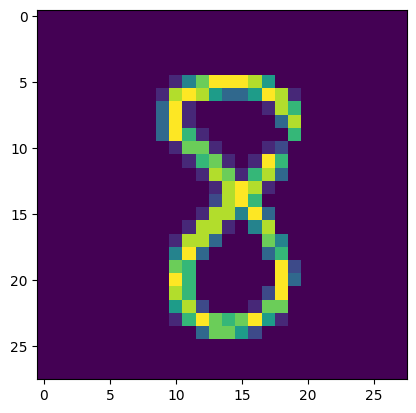

In [55]:
num = 555
sample = X[num]
predicted_class = classify(sample)
print(f"Predicted class for the sample: {predicted_class} and actually is: {int(y[num])}")
plt.imshow(sample.reshape(28,28))